<a href="https://colab.research.google.com/github/435wldms/essa/blob/main/%EC%BA%90%EA%B8%80_%ED%95%84%EC%82%AC%EC%8A%A4%ED%84%B0%EB%94%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


## 패션 MNIST 데이터셋 임포트하기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

In [5]:
len(train_labels)

60000

In [ ]:
train_labels

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 데이터 전처리
픽셀 값의 범위가 0~255 사이

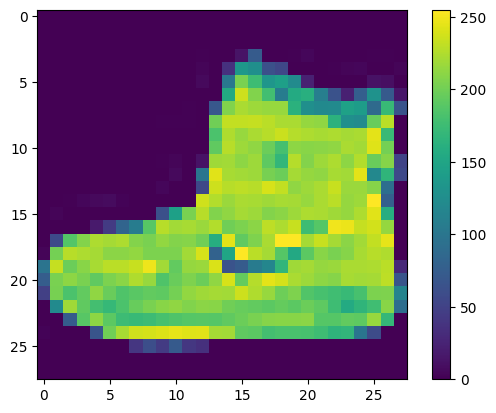

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

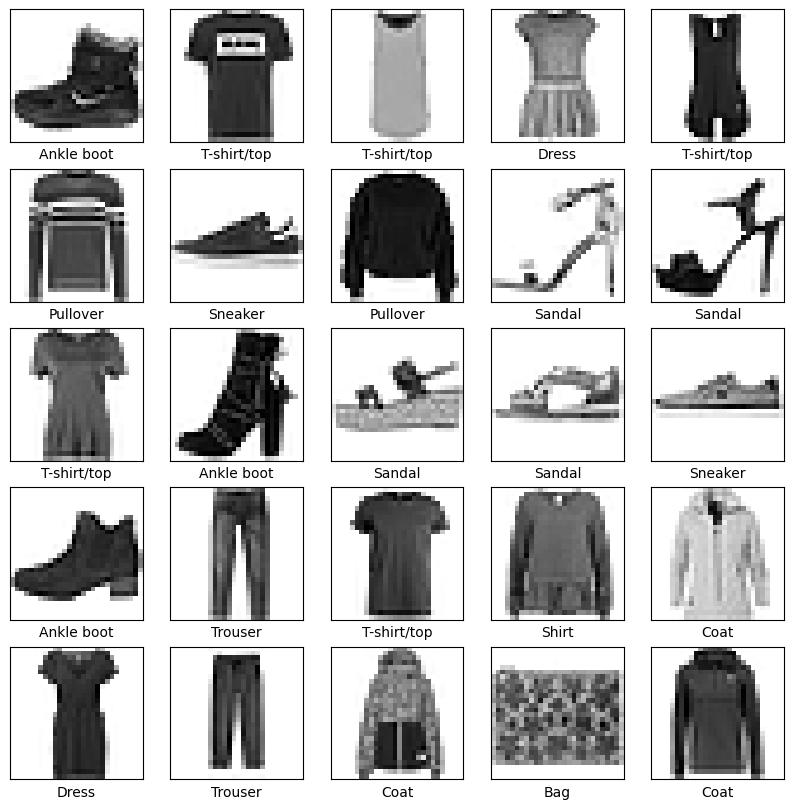

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

### 층 설정


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

이 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환, 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 함

픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결(완전 연결층)
>
첫 번째 `Dense` 층은 128개의 노드, 두 번째 (마지막) 층은 10개의 노드의 소프트맥스층 (이 층은 10개의 확률을 반환)

### 모델 컴파일

- 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정
- 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식
- 메트릭 - 훈련 및 테스트 단계를 모니터링하는 데 사용, 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련

1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인


### 모델 fit

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4959 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3734 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3369 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3126 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2944 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2803 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2671 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2571 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2453 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

### 정확도 평가


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3321 - accuracy: 0.8832 - 606ms/epoch - 2ms/step

Test accuracy: 0.8831999897956848


테스트 세트의 정확도가 훈련 세트의 정확도보다 낮음. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합 때문인데, 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말함

### 예측하기

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행, 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환

In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0]

array([1.5422964e-06, 6.7493886e-09, 1.8099341e-08, 2.6026808e-10,
       5.5303309e-07, 6.7119682e-03, 3.7675687e-07, 1.4917256e-02,
       2.6023920e-07, 9.7836804e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

10개 클래스에 대한 예측을 모두 그래프로 표현

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행 가능

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

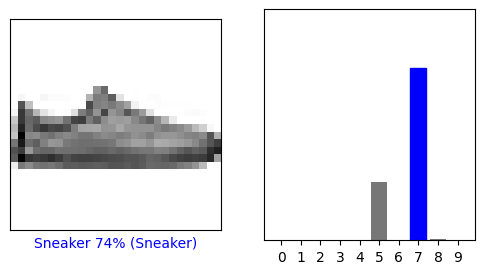

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

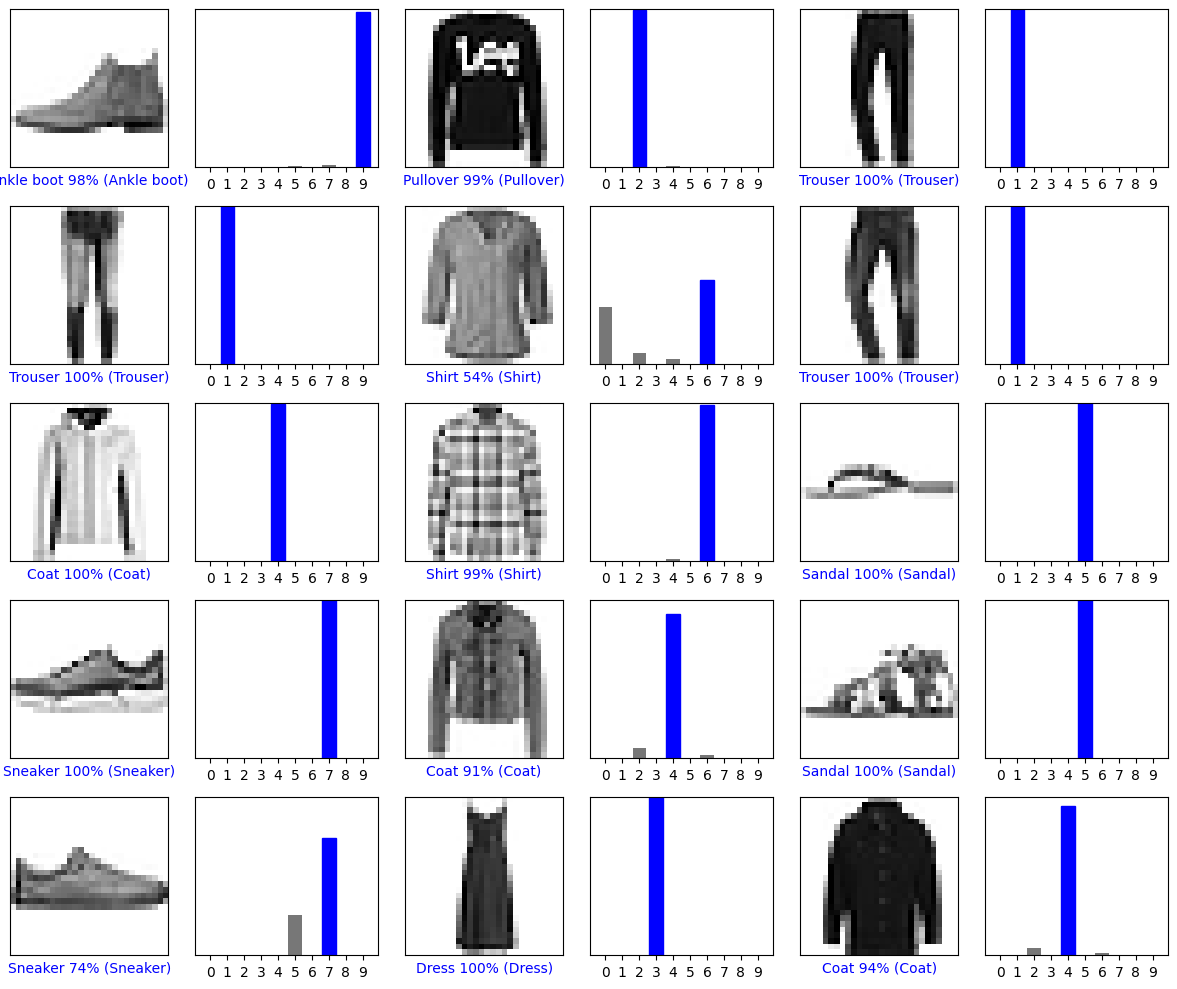

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측 수행

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 82ms/step
[[6.4704509e-05 4.6252051e-11 9.9458426e-01 6.5262782e-08 5.2619372e-03
  1.0969357e-13 8.9050620e-05 2.9037231e-12 4.3265846e-08 6.9778726e-13]]


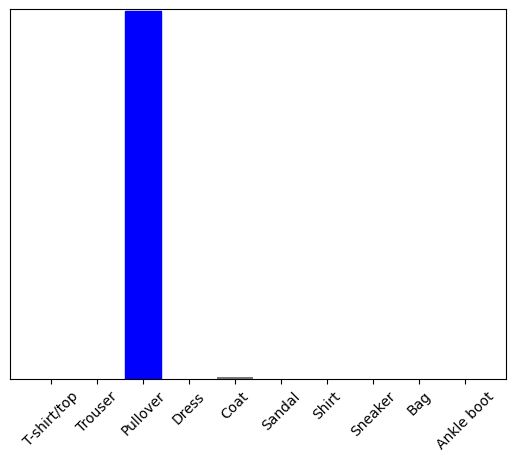

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

* `tf.keras.Model.predict`는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환
* 배치에서 이미지에 대한 예측을 가져오기

In [29]:
np.argmax(predictions_single[0])

2

-> 예상과 같이 모델이 레이블을 예측 잘 함